In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
glass = pd.read_excel('/content/glass.xlsx',sheet_name='glass')

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

there are no null values so no need to do imputation.

In [ ]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

lets copy the original values into a another variable so that no need to have a noise in the original values.

In [ ]:
glass1 = glass.copy()

In [ ]:
glass1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass1.duplicated().sum()

1

In [ ]:
glass1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [ ]:
glass1[glass1.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass1.drop_duplicates(inplace=True)

In [ ]:
glass1.shape

(213, 10)

In [ ]:
glass1.duplicated().sum()

0

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

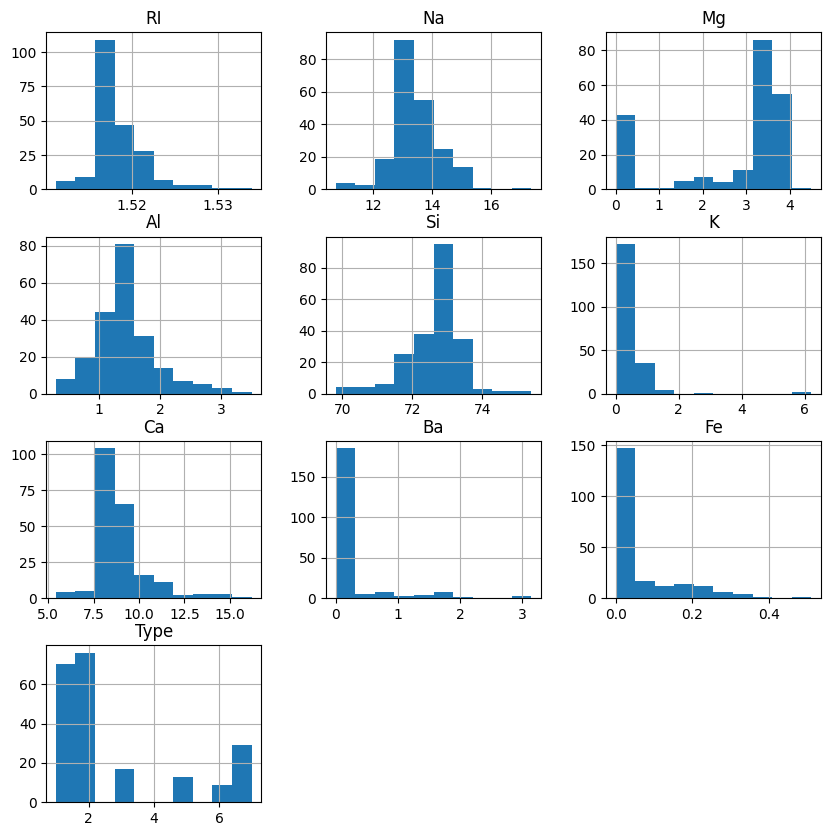

In [ ]:
glass.hist(figsize=(10,10))

<Axes: >

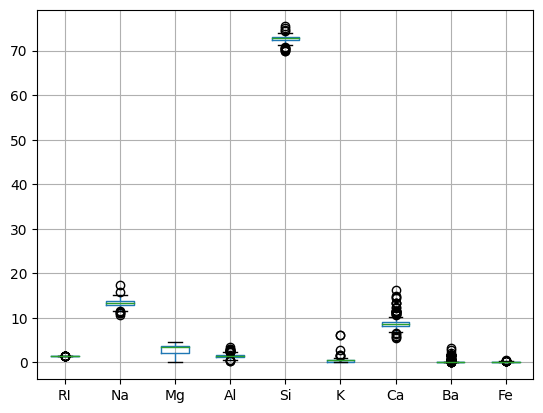

In [ ]:
#glass1.boxplot()
glass1.boxplot(column=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])

The above boxplot shows outliers for all the columns so we need to handle them.

<Axes: >

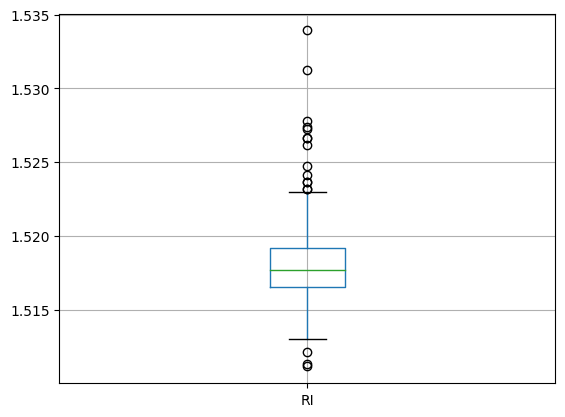

In [ ]:
glass1.boxplot(column=['RI'])

In [ ]:
# Calculate the IQR for each column
Q1 = glass1.quantile(0.25)
Q3 = glass1.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
cleaned_data = glass1[~((glass1 < lower_bound) | (glass1 > upper_bound)).any(axis=1)]

In [ ]:
cleaned_data.shape

(135, 10)

here the shape of the data after handling the outliers.

<Axes: >

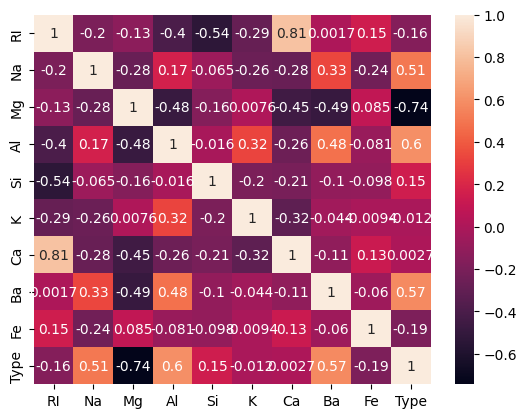

In [ ]:
sns.heatmap(glass1.corr(),annot=True)

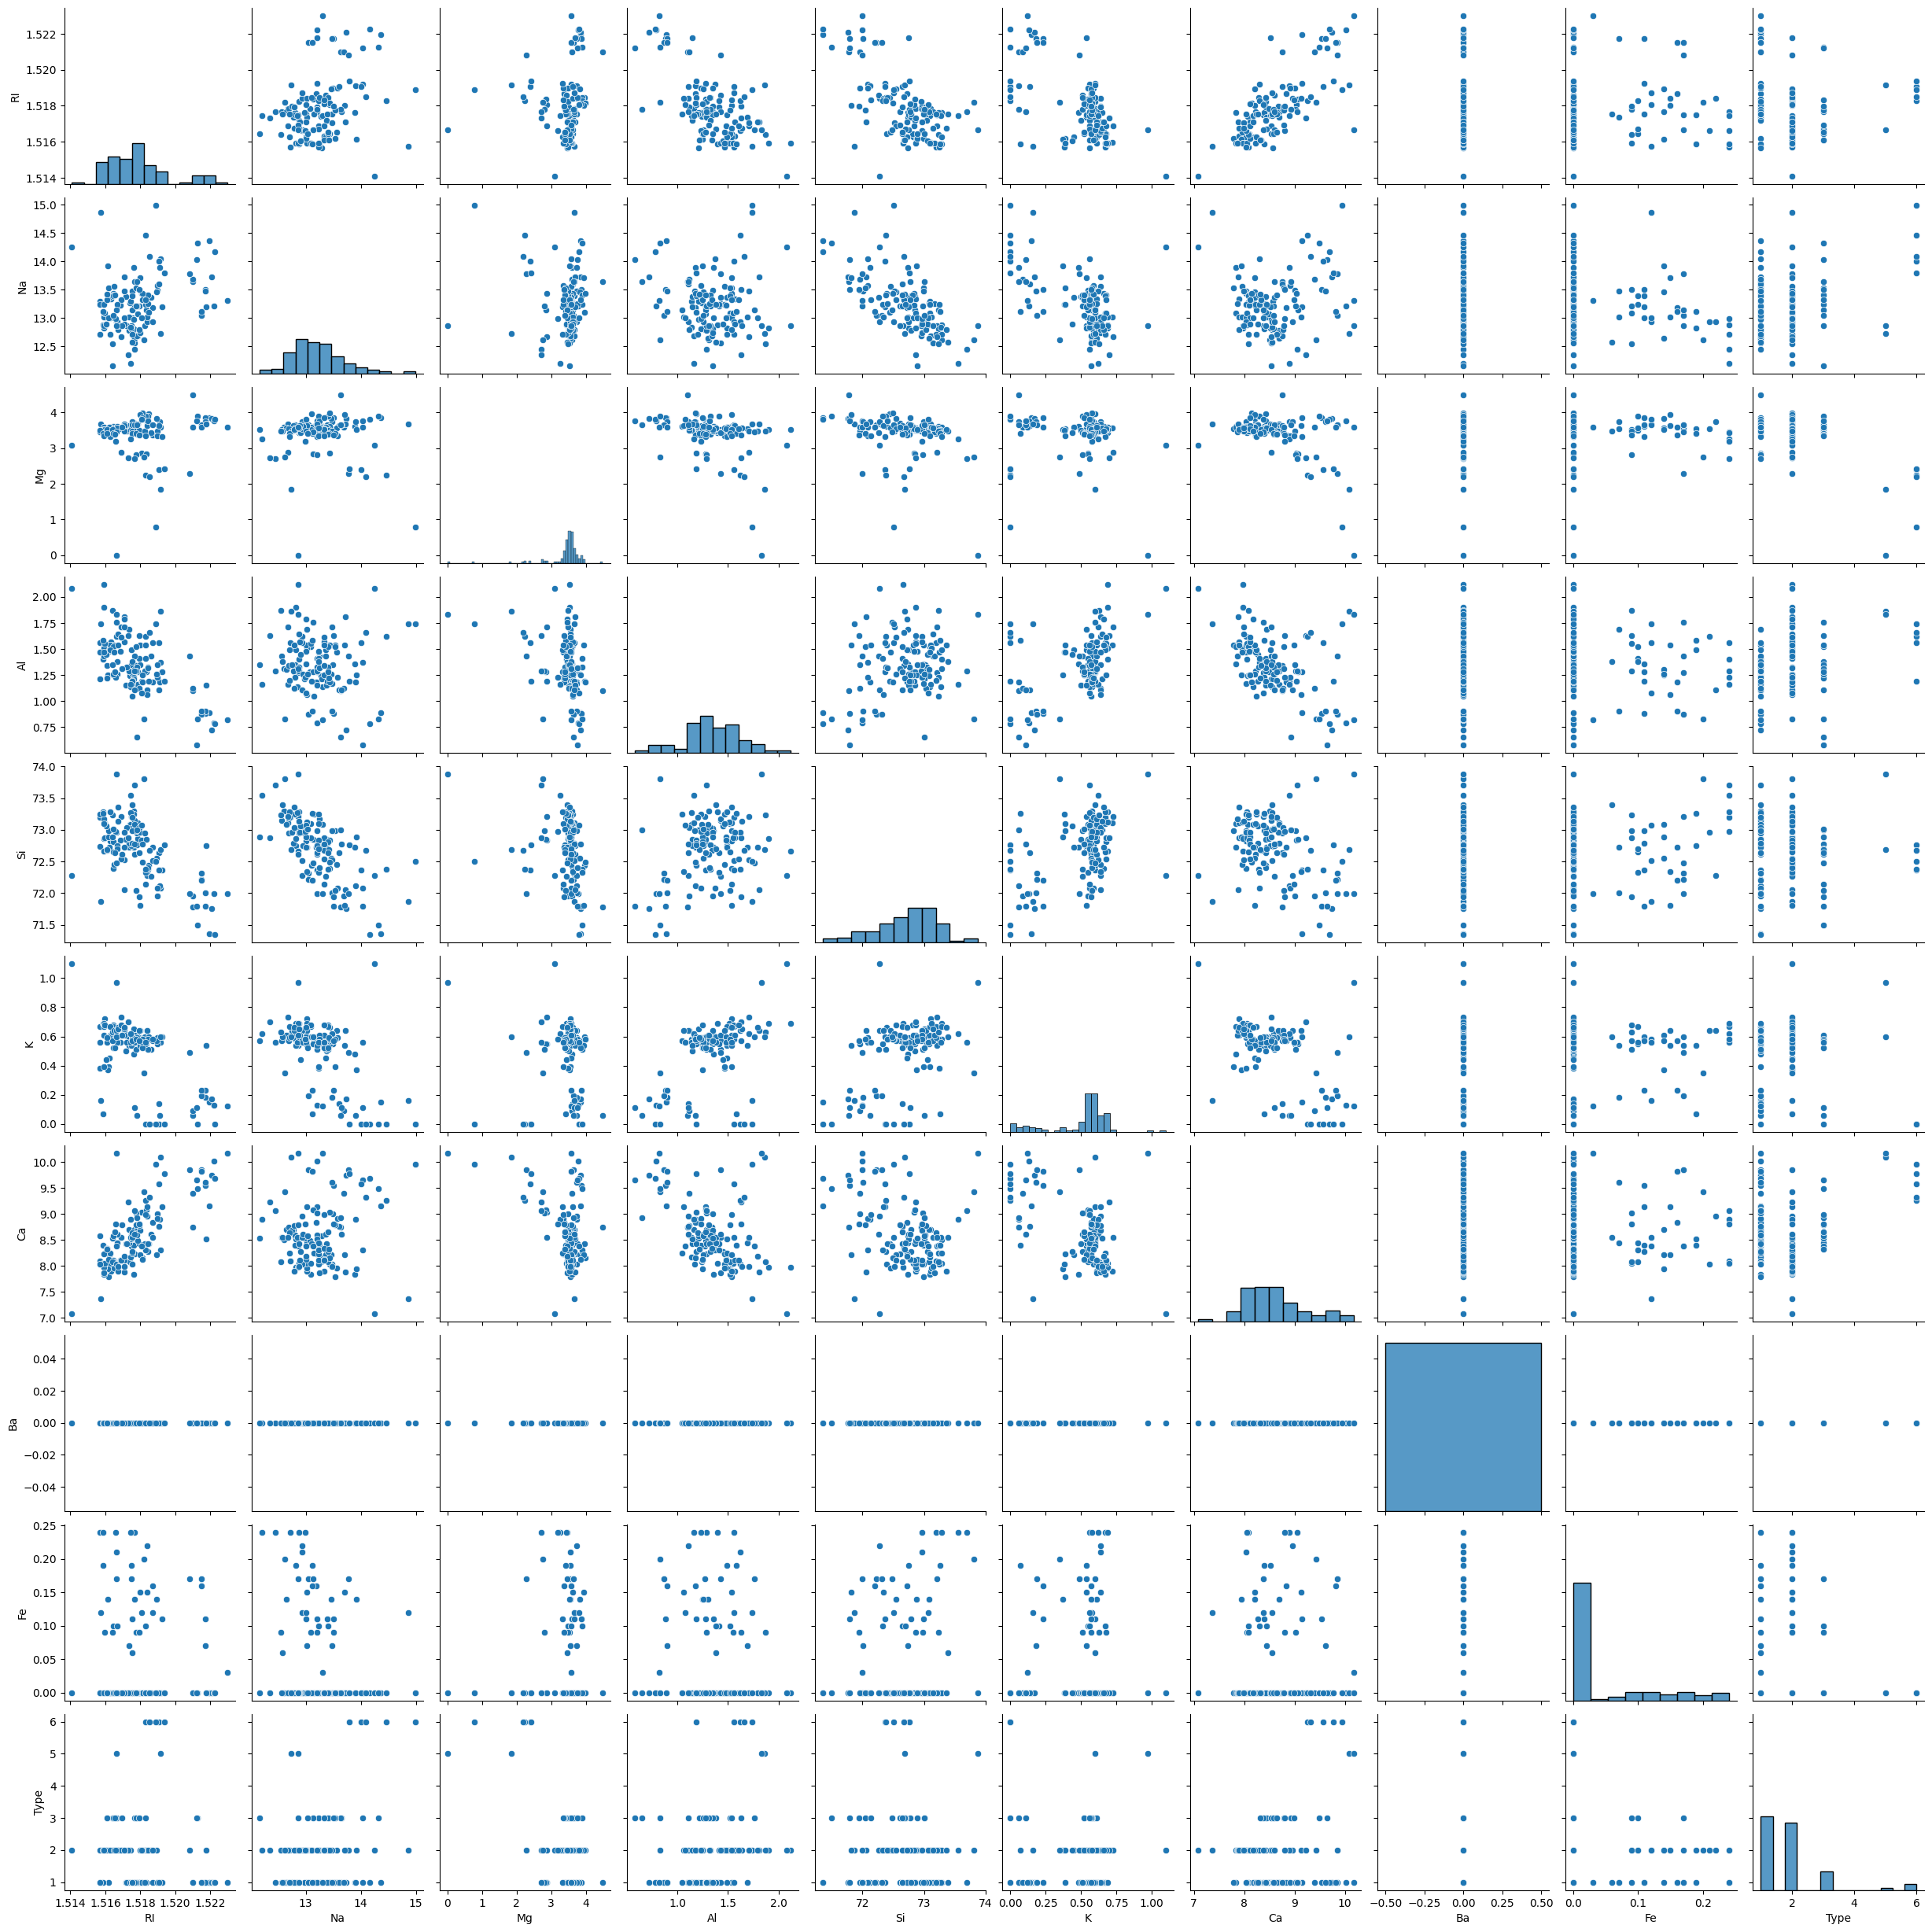

In [ ]:
sns.pairplot(cleaned_data)

In the above plot we will be dropping the Ba because it is not having the efficient data for developing the model.

In [ ]:
glass1.drop('Ba',axis=1,inplace=True)

In [ ]:
colnames = list(glass1.columns)
colnames

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe', 'Type']

**RANDOM FOREST MODEL**

In [ ]:
x = glass1.iloc[:, 0:9]  # Select all rows and columns from 0 to 8
y = glass1.iloc[:, -1]   # Select all rows and the last column

In [ ]:
x

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,7


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Assuming 'x_train' and 'y_train' are your training data
model.fit(x_train, y_train)  # Train the model

RandomForestClassifier(max_features=3)

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set

In [ ]:
pd.Series(preds).value_counts() # getting the count of each category

2    15
1    10
7     9
6     3
5     3
3     3
Name: count, dtype: int64

In [ ]:
preds

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 3, 2, 1, 1, 6, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 7, 1])

In [ ]:
num_trees = 100
max_features = 3
kFold = KFold(n_splits=10,random_state= 42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results = cross_val_score(model,x,y,cv=kFold)
print(results.mean())

0.9904761904761905


In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score # Import necessary functions

# Assuming 'preds' are the predictions from your model and 'y_test' are the true labels
precision = precision_score(y_test, preds, average='weighted')  # Adjust 'average' as needed
f1 = f1_score(y_test, preds, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, preds, average='weighted')  # Adjust 'average' as needed
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
F1-score: 1.0
Recall: 1.0


The above model is well fitted and having a good accuracy score and have completed all the questions asked related to the model.

**Questions asked**


**Q1)**Bagging



Creates multiple subsets of data: Randomly samples the original dataset with replacement to create multiple subsets (bootstrap samples).

Trains independent models: Trains a separate model on each subset. These models can be of the same type (e.g., decision trees) or different.

Combines predictions: Aggregates predictions from individual models (e.g., by averaging or voting) to produce a final prediction.


Boosting



Trains models sequentially: Trains models sequentially, with each model attempting to correct the errors of its predecessor.

Weights data points: Assigns weights to data points, giving more weight to those that were misclassified by previous models.

Combines models with weighted voting: Combines the predictions of all models using weighted voting, where the weights are determined by the model's performance.


**Q2)**We can handle imbalance in the data by using:
Resampling techniques

cost-sensitive techniques

ensemble methods

algorithmic modifications

evaluation metrics
